<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/traditional_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traditional CNN model Implementation**

Importing the necessary Libraries

In [ ]:
# to access dataset from Kaggle
import kagglehub
#For file path operations and directory handling
import os
#For processing image data(resizing ,converting , saving)
import cv2
# ploting the grahs and visualization
import matplotlib.pyplot as plt
#to introduce radomness(random state)
import random
#Essential for numerical operations, image array handling, and reshaping input data.
import numpy as np
 # Progress bar for large datasets  — improves readability and monitoring.
from tqdm import tqdm
# to import deep learning methods
import tensorflow as tf
# tensorflow for CNN architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
#for spliting data into train and test data.
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#import confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
# plots for advanced visualizationn
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-alphabet


In [ ]:
# Define paths
input_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (50, 50)  # Resizing the image to 50 pixels
NUM_CLASSES = 29  # ASL Alphabet (26 letters + space, delete, nothing)

# Function to preprocess and load images
def preprocess_and_load_images(input_dir):
    X, y = [], []

    #Creates a mapping like {‘A’: 0, ‘B’: 1, ..., ‘space’: 26, ‘delete’: 27, ‘nothing’: 28}
    label_map = {label: idx for idx, label in enumerate(sorted(os.listdir(input_dir)))}

    #Loops through each folder in the dataset (A-Z folders).
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Loading the image

            if img is None:
                continue  # Skip unreadable images

            # Preprocessing steps
            img = cv2.resize(img, IMG_SIZE)  # Resize
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            #Applies binary thresholding to get sharp hand shapes.
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
            img_normalized = img_thresh / 255.0  # Normalize to [0,1]

            # Store preprocessed image and label
            X.append(img_normalized)
            y.append(label_map[category])

    # Convert to numpy arrays
    X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
    y = np.array(y)
    y = to_categorical(y, NUM_CLASSES)  # One-hot encode

    return X, y

# Load and preprocess data
X, y = preprocess_and_load_images(input_dir)

# Split into train and test sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dataset loaded! X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Define CNN model - sequential model
def build_model():
    model = Sequential([

        #First convolutioonal layer
        #convolutional layer with 16 filters of size 3x3.
        Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
        #Downsamples the image by taking the max from 2x2 regions.
        MaxPooling2D((2,2)),
        #disables 30% of neurons during training to reduce overfitting.
        Dropout(0.3),


        #Second convolutional layer
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        #Converts 2D features to 1D vector.
        Flatten(),
        #Fully connected layer with 128 neurons.
        Dense(128, activation='relu'),
        Dropout(0.5),
        #Dense layer outputs 29 probabilities
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  loss='categorical_crossentropy',#Suitable for multi-class classification.
                  metrics=['accuracy'])
    return model

# Create and train model
model = build_model()
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    batch_size=32)

# Save the trained model
model.save("sign_language_cnn.h5")

print("Model training complete and saved as 'sign_language_cn.h5' 🎉")

100%|██████████| 29/29 [09:25<00:00, 19.48s/it]


Dataset loaded! X_train shape: (60900, 50, 50, 1), y_train shape: (60900, 29)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,285 (1.92 MB)

 Trainable params: 504,285 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 125s 64ms/step - accuracy: 0.2919 - loss: 2.3235 - val_accuracy: 0.7764 - val_loss: 0.7703
Epoch 2/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 147s 67ms/step - accuracy: 0.5925 - loss: 1.1934 - val_accuracy: 0.8436 - val_loss: 0.5797
Epoch 3/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 135s 71ms/step - accuracy: 0.6507 - loss: 1.0192 - val_accuracy: 0.8783 - val_loss: 0.4237
Epoch 4/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 147s 73ms/step - accuracy: 0.6810 - loss: 0.9298 - val_accuracy: 0.8915 - val_loss: 0.3868
Epoch 5/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 139s 72ms/step - accuracy: 0.7074 - loss: 0.8558 - val_accuracy: 0.9007 - val_loss: 0.3444
Epoch 6/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 140s 71ms/step - accuracy: 0.7109 - loss: 0.8408 - val_accuracy: 0.9064 - val_loss: 0.3217
Epoch 7/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 138s 69ms/step - accuracy: 0.7238 - loss: 0.8129 - val_accuracy: 0.9116 - val_loss: 0.3136
Epoch 8/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 147s 72ms/step - accuracy: 

Model training complete and saved as 'sign_language_cnn_optimized.h5' 🎉


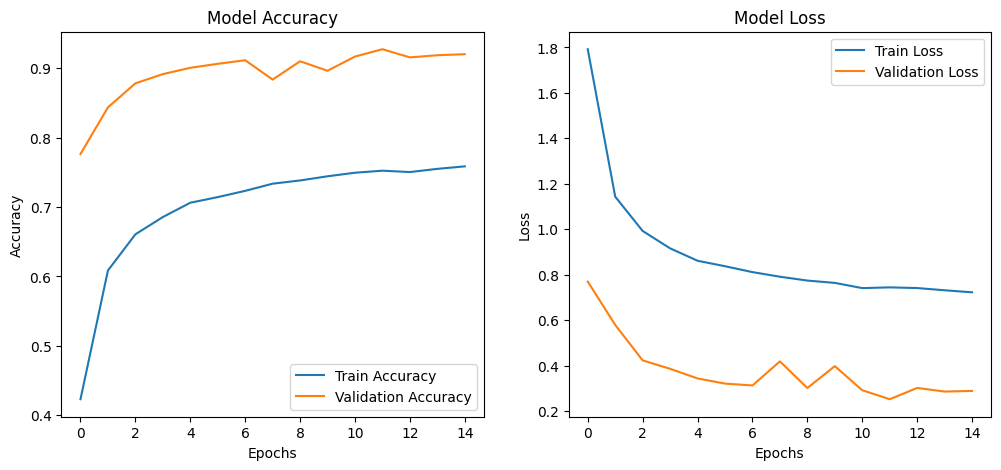

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

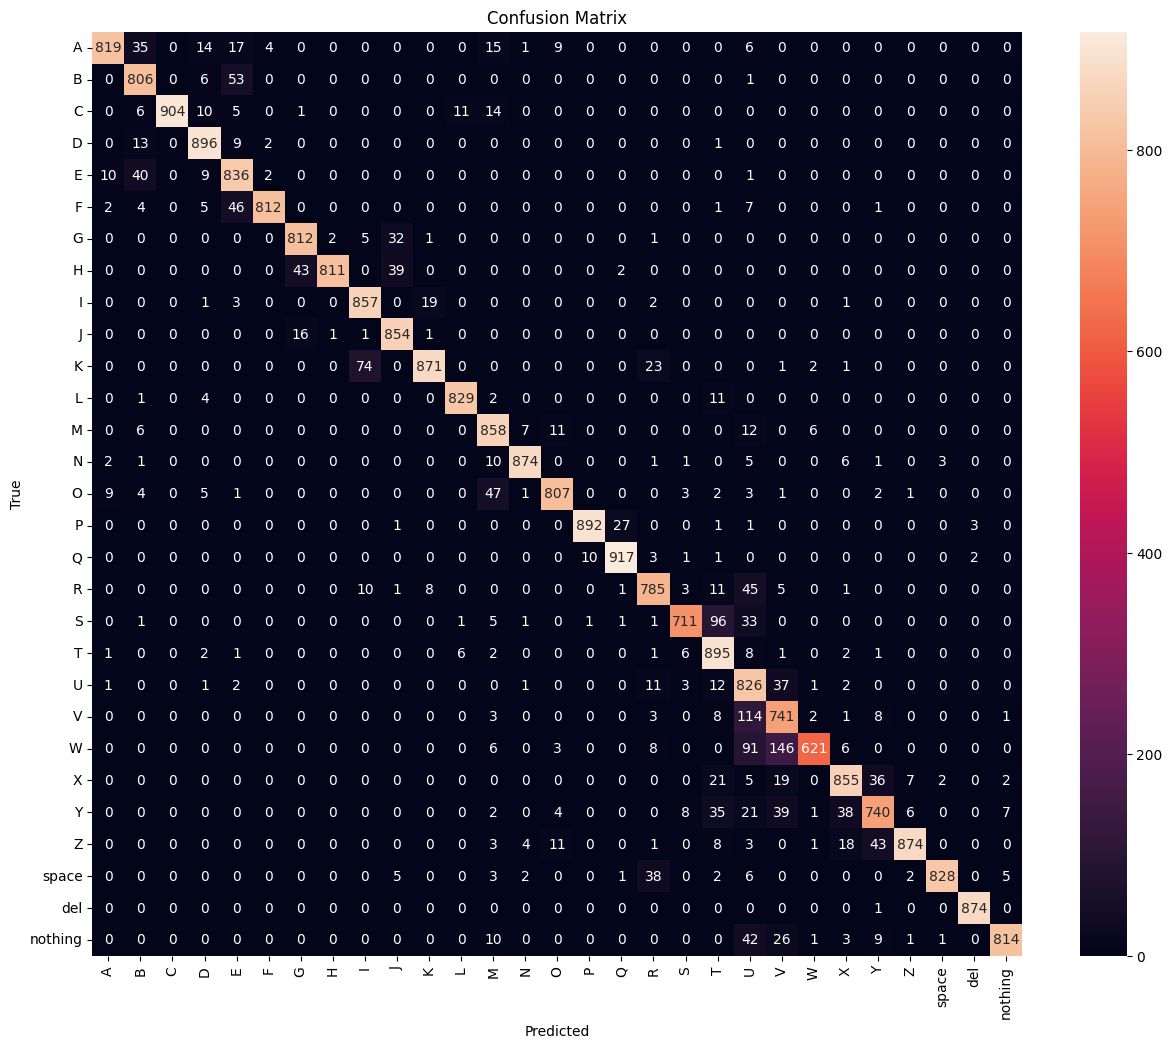

In [ ]:

# Get true labels
true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_map.values(),
            yticklabels=label_map.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:


print(classification_report(true_classes, predicted_classes,
                           target_names=label_map.values()))

              precision    recall  f1-score   support

           A       0.97      0.89      0.93       920
           B       0.88      0.93      0.90       866
           C       1.00      0.95      0.97       951
           D       0.94      0.97      0.96       921
           E       0.86      0.93      0.89       898
           F       0.99      0.92      0.96       878
           G       0.93      0.95      0.94       853
           H       1.00      0.91      0.95       895
           I       0.90      0.97      0.94       883
           J       0.92      0.98      0.95       873
           K       0.97      0.90      0.93       972
           L       0.98      0.98      0.98       847
           M       0.88      0.95      0.91       900
           N       0.98      0.97      0.97       904
           O       0.96      0.91      0.93       886
           P       0.99      0.96      0.98       925
           Q       0.97      0.98      0.97       934
           R       0.89    